**KELOMPOK DATA LAB**

1. Oktavian Dwi Putra
2. Muhammad Ilham
3. Maulid Uly Mada
4. Seto Bhanu Adyatma
5. Mega Pangastuti
6. Rasyidah Maulida Putri Andini
7. Muhammad Hasbi Ashshiddiqi
8. Raihan Damar


## **1. Descriptive Statistics (5 poin)**

Gunakan function <u>**info**</u> dan <u>**describe**</u> pada dataset final project kalian. Tuliskan hasil observasinya, seperti:<br>
<br>
A. Apakah ada kolom dengan <u>**tipe data kurang sesuai**</u>, atau nama kolom dan isinya kurang sesuai?<br>
B. Apakah ada kolom yang memiliki <u>**nilai kosong**</u>? Jika ada, apa saja?<br>
C. Apakah ada kolom yang memiliki <u>**nilai summary agak aneh**</u>? (min/mean/median/max/unique/top/freq)<br>
<br>
Untuk masing-masing jenis observasi, tuliskan juga jika tidak ada masalah, misal untuk A: ```“Semua tipe data sudah sesuai”```

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [ ]:
df = pd.read_csv('/content/Product_Exclusive_Classification.csv')
df.head()

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
0,50,SEPHORA COLLECTION,no category,5.0,46.0,0.0,50.0,50.0,0
1,304,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
2,404,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
3,443,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
4,463,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0


In [ ]:
# A
print("Kolom dengan tipe data kurang sesuai atau nama kolom dan isinya kurang sesuai:")
print(df.info())
print("\n")

Kolom dengan tipe data kurang sesuai atau nama kolom dan isinya kurang sesuai:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB
None




In [ ]:
# B
print("Kolom yang memiliki nilai kosong:")
print(df.isnull().sum())  # Menampilkan jumlah nilai kosong per kolom
print("\n")

Kolom yang memiliki nilai kosong:
id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64




In [ ]:
# C
print("Kolom yang memiliki nilai summary aneh:")
print(df.describe(include='all'))

Kolom yang memiliki nilai summary aneh:
                  id               brand category       rating  \
count   8.000000e+03                8000     7987  7905.000000   
unique           NaN                 310      142          NaN   
top              NaN  SEPHORA COLLECTION  Perfume          NaN   
freq             NaN                 492      619          NaN   
mean    1.910231e+06                 NaN      NaN     4.085136   
std     3.858353e+05                 NaN      NaN     0.761069   
min     5.000000e+01                 NaN      NaN     0.000000   
25%     1.773379e+06                 NaN      NaN     4.000000   
50%     2.030360e+06                 NaN      NaN     4.000000   
75%     2.185074e+06                 NaN      NaN     4.500000   
max     2.293801e+06                 NaN      NaN     5.000000   

        number_of_reviews          love        price  value_price    exclusive  
count         7991.000000  7.966000e+03  7992.000000  7983.000000  8000.000000  
uniqu



*   A. Berdasarkan info dataset di atas, dapat kita lihat ada beberapa kolom yang memiliki tipe data yang kurang sesuai, yaitu kolom **number_of_reviews** dan **love** yang memiliki tipe data **float64**. Sementara, pada kenyataannya **jumlah reviews** dan **love** adalah tipe data numerik yang berbentuk diskrit sehingga seharusnya ditampilkan dalam bentuk bilangan bulat atau tipe data **integer** ```(int64)```.
*   B. Terdapat kolom yang memiliki nilai kosong, yaitu kolom : **category**, **rating**, **number_of_reviews**, **love**, **price**, **value_price**.
*   C. Kolom **number_of_reviews**, **love**, **price** dan **value_price** tampaknya skew ke kanan (nilai mean dan mediannya berbeda jauh), mungkin dapat dilakukan transformasi log nantinya. Selain itu, pada kolom-kolom tersebut juga terdapat indikasi adanya outlier yang ditunjukkan dari **nilai max**-nya yang berbeda cukup jauh jika dibandingkan dengan nilai lainnya. Lalu, kolom **brand** dan **category** memiliki kardinalitas (jumlah unique values) yang cukup tinggi, yaitu **310** dan **142**.  Tampaknya kita perlu exclude fitur ini dari dataset untuk pemodelan.




## **2. Univariate Analysis (10 poin)**

Gunakan visualisasi untuk melihat <u>**distribusi**</u> masing-masing kolom (feature maupun target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal <u>**skewed**</u>, <u>**bimodal**</u>, ada <u>**outlier**</u>, ada <u>**nilai yang mendominasi**</u>, <u>**kategorinya terlalu banyak**</u>, dsb). Jelaskan juga apa yang harus <u>**di-follow up**</u> saat data pre-processing.

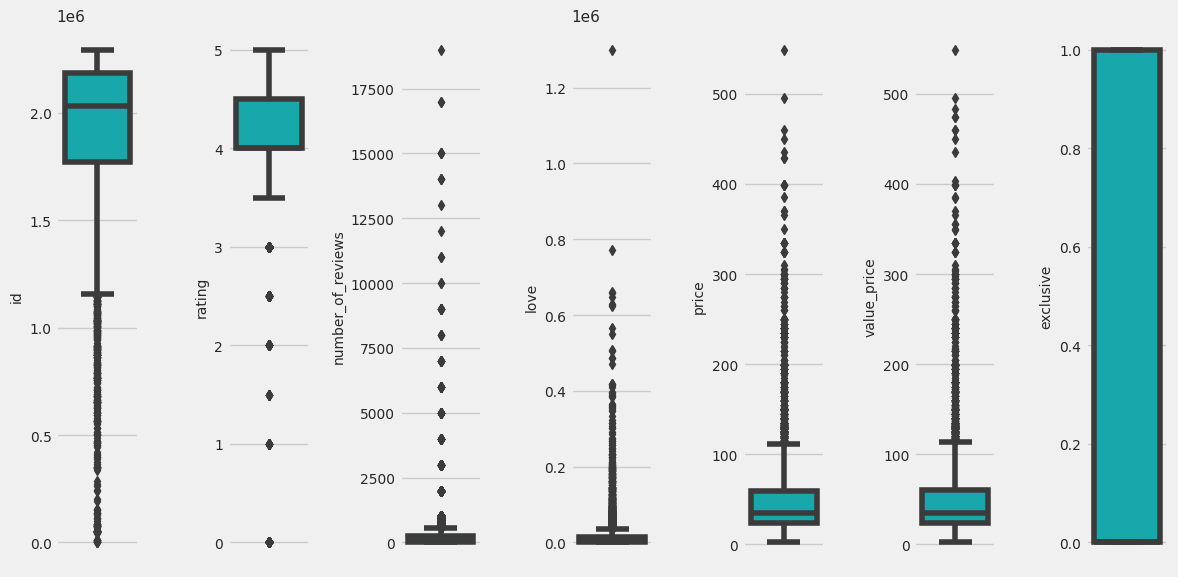

In [ ]:
# Membagi dataset menjadi numericals dan categoricals
numerical   = df.select_dtypes(['int64', 'float64'])
categorical = df.select_dtypes(['object'])

# Mengambil nama kolom numerical
features_num = numerical.columns

# Mengatur ukuran gambar
plt.figure(figsize = (12, 6))

# Membuat boxplot
for i in range(0, len(features_num)):
    plt.subplot(1, len(features_num), i+1)
    sns.boxplot(y = df[features_num[i]], color = '#00bfc4', orient = 'v')
    plt.ylabel(features_num[i], fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.tight_layout()

plt.show()

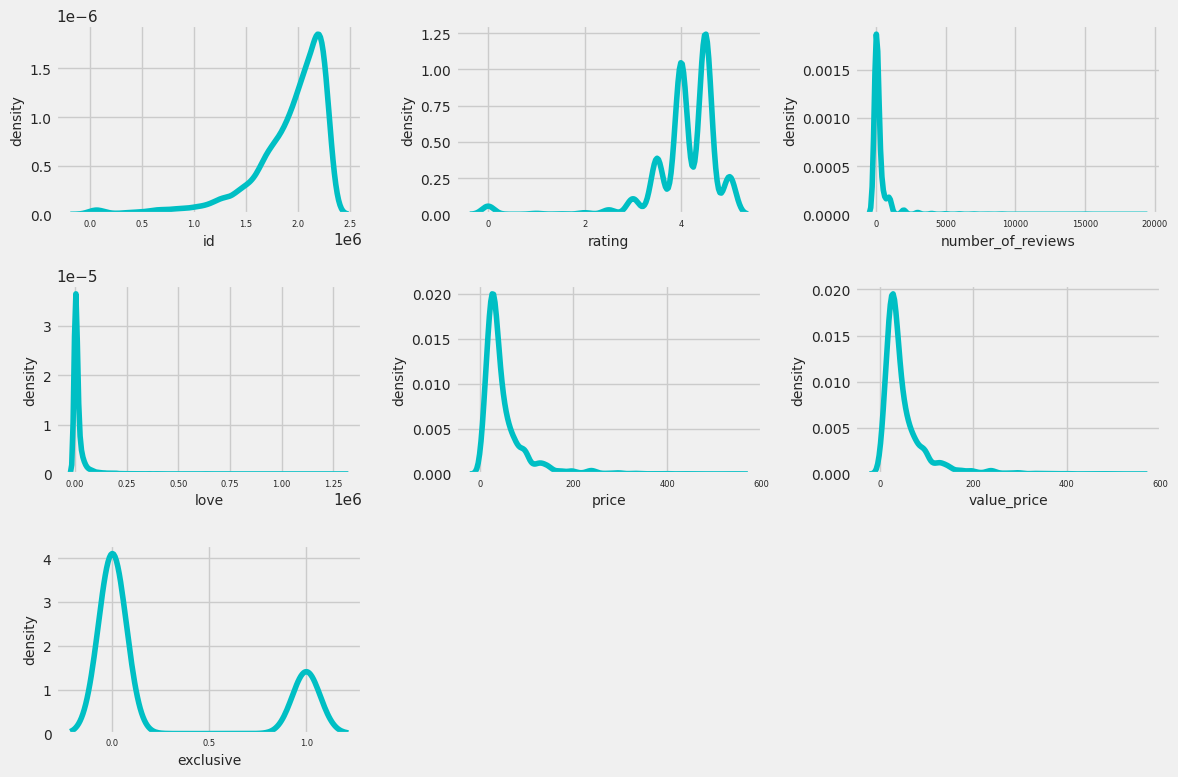

In [ ]:
# Mengatur ukuran gambar
plt.figure(figsize = (12, 8))

# Membuat kdeplot
for i in range(0, len(features_num)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x = df[features_num[i]], color = '#00bfc4')
    plt.xlabel(features_num[i], fontsize = 10)
    plt.xticks(fontsize = 6)
    plt.ylabel('density', fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.tight_layout()

plt.show()

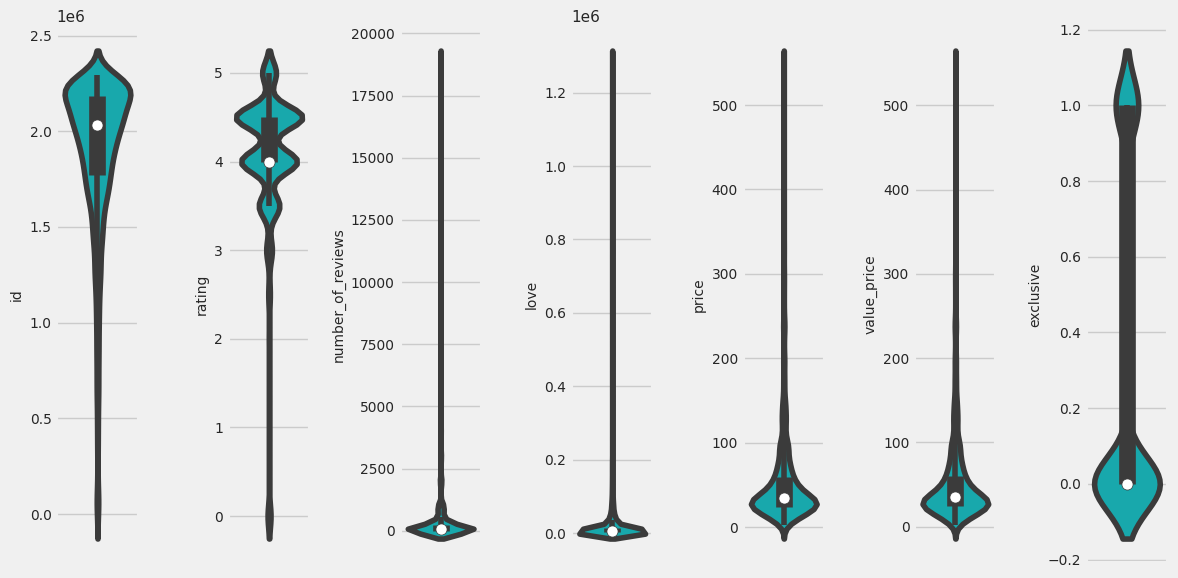

In [ ]:
# Mengatur ukuran gambar
plt.figure(figsize = (12, 6))

# Membuat violinplot
for i in range(0, len(features_num)):
    plt.subplot(1, len(features_num), i+1)
    sns.violinplot(y = df[features_num[i]], color = '#00bfc4')
    plt.ylabel(features_num[i], fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.tight_layout()

plt.show()

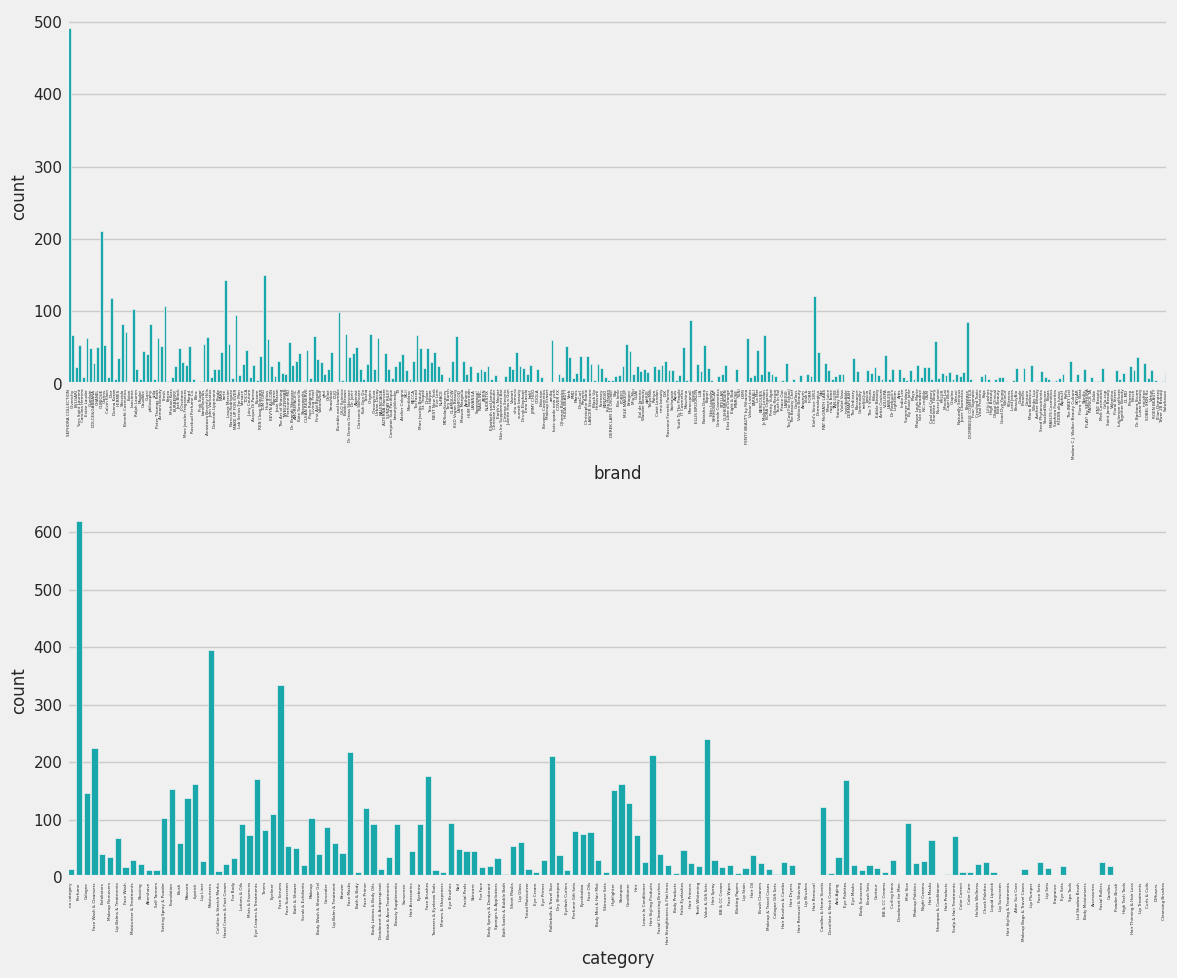

In [ ]:
# Mengatur ukuran gambar
plt.figure(figsize = (12,10))

# Mengambil nama kolom categorical
features_cat = categorical.columns

# Membuat countplot
for i in range(0, len(features_cat)):
    plt.subplot(2, 1, i+1)
    sns.countplot(x = df[features_cat[i]], color = '#00bfc4')
    plt.xlabel(xlabel = features_cat[i], fontsize = 12)
    plt.ylabel(ylabel = 'count', fontsize = 12)
    plt.xticks(fontsize = 3, rotation = 90)
    plt.tight_layout()

plt.show()

## **3. Multivariate Analysis (15 poin)**
Lakukan multivariate analysis (seperti <u>**correlation heatmap**</u> dan <u>**category plots**</u>, sesuai yang diajarkan di kelas). Tuliskan hasil observasinya, seperti:<br>
<br>
A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang <u>**paling relevan**</u> dan harus dipertahankan?<br>B. Bagaimana korelasi antar-feature, apakah ada <u>**pola yang menarik**</u>? Apa yang perlu dilakukan terhadap feature itu?<br>
<br>
Tuliskan juga jika memang <u>**tidak ada feature**</u> yang saling berkorelasi.

<ipython-input-10-fb70fe987c59>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'YlGnBu', annot=True, fmt='.2f')


<Axes: >

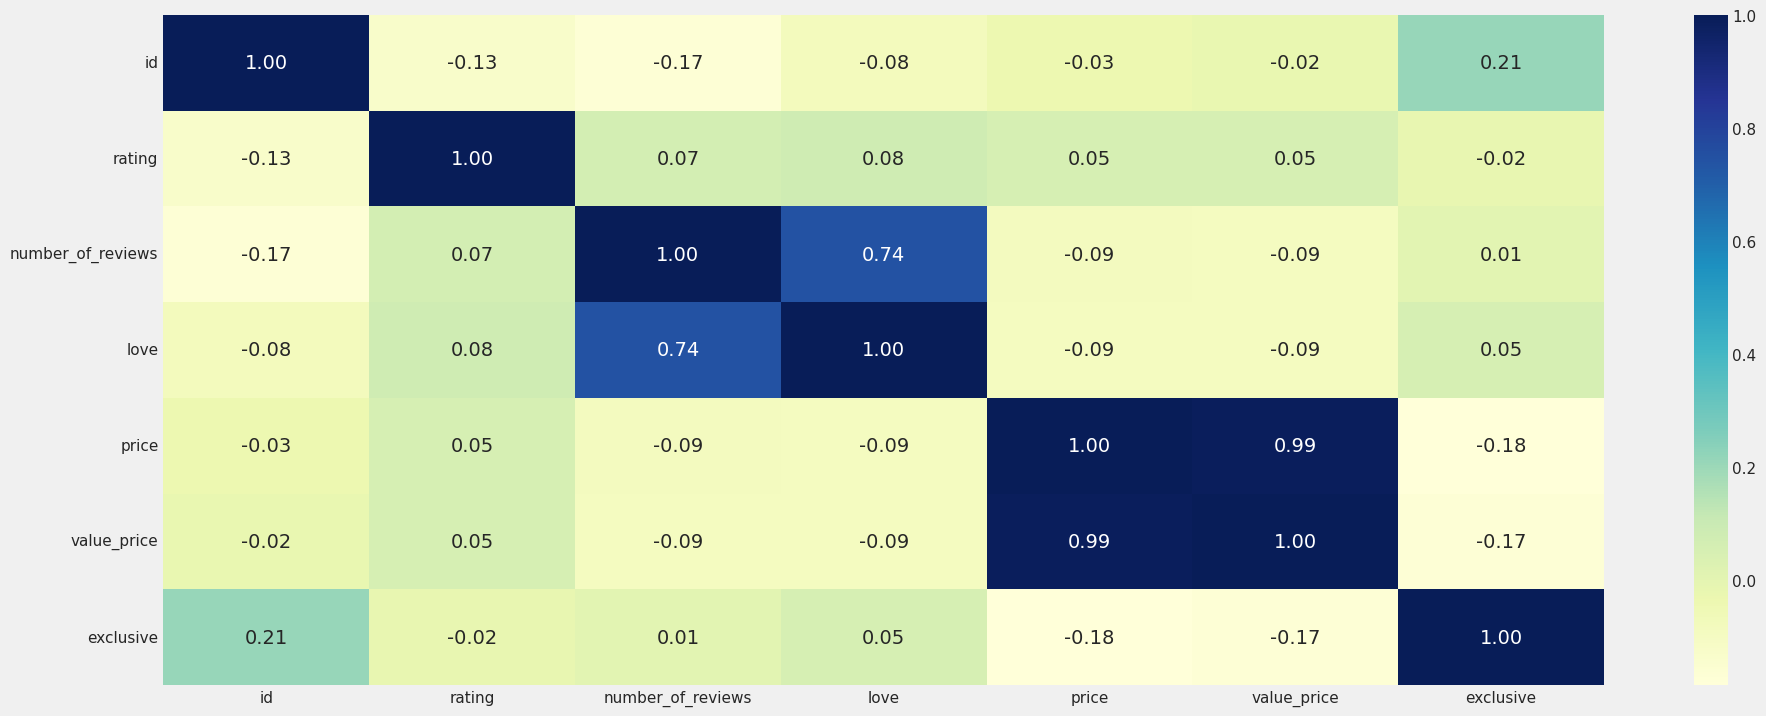

In [ ]:
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot=True, fmt='.2f')

Korelasi yang memiliki nilai tinggi (diatas 0.7) ada di hubungan price dan value_price, dan hubungan love dan number_of_review. Maka, sebaiknya dipilih satu saja bisa diambil price saja karena price adalah harga yang digunakan untuk transaksi dari data yang diolah dan dipilih number _of_review saja, karena berhubungan dengan rata - rata rating yang ada di kolom.

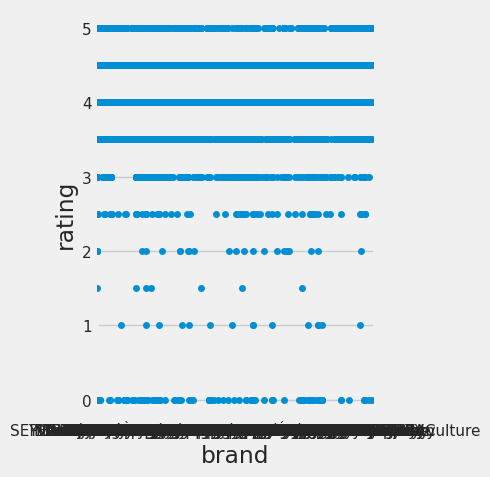

In [ ]:
sns.catplot(data=df,x='brand',y='rating')

Grafik category plot menampilkan hasil dari persebaran rating yang didapat masing masing brand.

## **4. Data Cleansing (40 poin)**

Lakukan pembersihan data, sesuai yang diajarkan di kelas, seperti:<br>
<br>
A. Handle missing values<br>
B. Handle duplicated data<br>
C. Handle outliers<br>
D. Feature transformation<br>
E. Feature encoding<br>
F. Handle class imbalance<br>
<br>
Di laporan homework, tuliskan <u>**apa saja yang telah dilakukan**</u> dan <u>**metode yang digunakan**</u>.<br>

Tetap tuliskan jika memang ada tidak yang perlu di-handle (contoh: ```“Tidak perlu feature encoding karena semua feature sudah numerical”``` atau ```“Outlier tidak di-handle karena akan fokus menggunakan model yang robust terhadap outlier”```).

Terlebih dahulu dilakukan proses analisa untuk mengetahui kolom mana saja yang mengandung missing value.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


Berdasarkan informasi di atas, dapat disimpulkan bahwa terdapat 6 kolom yang memiliki missing value yaitu kolom category, rating, number_of_reviews, love, price, value_price

Selanjutnya, didapatkan jumlah missing value dari masing-masing kolom adalah sebagai berikut :
1. kolom category memiliki 13 missing value
2. kolom rating memiliki 95 missing value
3. kolom number_of_reviews memiliki 9 missing value
4. kolom love memiliki 34 missing value
5. kolom price memiliki 8 missing value
6. kolom value_price memiliki 17 missing value


Karena kolom category, number_of_reviews, love, price, dan value_price memiliki kurang dari 1% dari total jumlah data maka akan dilakukan penghapusan data yang mengandung missing value pada kolom tersebut.
<br>
Kemudian, karena kolom rating memiliki missing value lebih dari 1% dari total jumlah data, maka akan dilakukan inputasi data menggunakan median dari data kolom tersebut.

In [ ]:
# Menghapus baris yang memiliki missing value di bawah 1% dari total data
df.dropna(subset = ['category'], inplace=True)
df.dropna(subset = ['number_of_reviews'], inplace=True)
df.dropna(subset = ['love'], inplace=True)
df.dropna(subset = ['price'], inplace=True)
df.dropna(subset = ['value_price'], inplace=True)

# Melakukan imputasi baris yang memiliki missing value di atas 1% dari total data
df['rating'].fillna(df['rating'].median(), inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7921 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7921 non-null   int64  
 1   brand              7921 non-null   object 
 2   category           7921 non-null   object 
 3   rating             7921 non-null   float64
 4   number_of_reviews  7921 non-null   float64
 5   love               7921 non-null   float64
 6   price              7921 non-null   float64
 7   value_price        7921 non-null   float64
 8   exclusive          7921 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 618.8+ KB


Kemudian, dilakukan pengecekan apakah ada data yang terduplikasi dengan kolom id sebagai acuannya.

In [ ]:
duplicate = df[df.duplicated('id')]

print("Duplicate Rows based on id :")

# Print the resultant Dataframe
duplicate

Duplicate Rows based on id :


,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
319,1029958,Marc Jacobs Fragrances,Perfume,4.5,184.0,8000.0,106.0,106.0,0
381,1124155,Josie Maran,Skincare,4.0,78.0,6400.0,12.0,12.0,1
419,1164805,bareMinerals,Bronzer,4.5,192.0,947.0,22.0,22.0,0
506,1248988,Viktor&Rolf,Lotions & Oils,4.5,24.0,4400.0,93.0,93.0,0
555,1284629,Kate Somerville,Skincare,4.5,289.0,39100.0,24.0,24.0,0
637,1340694,Clarisonic Skincare,Facial Cleansing Brushes,4.5,4.0,0.0,27.0,27.0,0
771,1426170,Clarisonic Skincare,Facial Cleansing Brushes,5.0,2.0,0.0,44.0,54.0,0
1102,1565944,TOM FORD,Bath & Shower,2.0,1.0,264.0,70.0,70.0,0
1561,1688845,MAKE UP FOR EVER,Face Primer,3.5,2000.0,0.0,17.0,17.0,1
1615,1696798,Klorane,Hair,4.0,2.0,2000.0,10.0,10.0,0


Karena terdapat data yang terduplikasi, sehingga dilakukan penghapusan data yang terduplikasi

In [ ]:
# Menghapus data duplicate
df.drop_duplicates(subset=['id'], inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7873 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7873 non-null   int64  
 1   brand              7873 non-null   object 
 2   category           7873 non-null   object 
 3   rating             7873 non-null   float64
 4   number_of_reviews  7873 non-null   float64
 5   love               7873 non-null   float64
 6   price              7873 non-null   float64
 7   value_price        7873 non-null   float64
 8   exclusive          7873 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 615.1+ KB


In [ ]:
## Handle outliers
from scipy import stats

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['rating', 'number_of_reviews', 'love', 'price', 'value_price', 'exclusive']:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 7873
Jumlah baris setelah memfilter outlier: 7357


<Axes: xlabel='rating', ylabel='Density'>

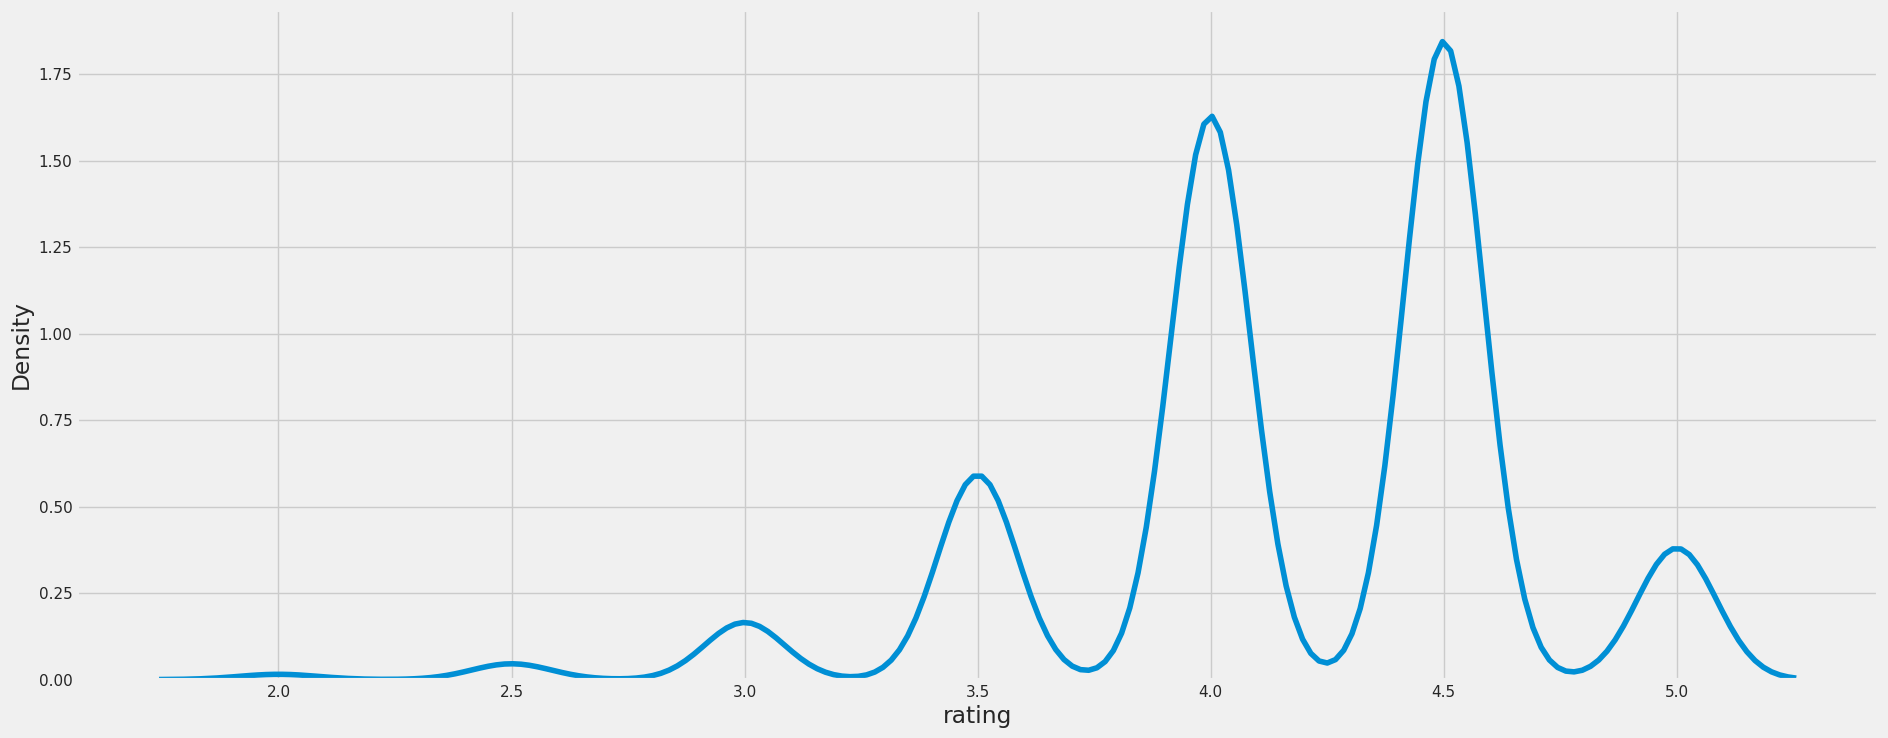

In [ ]:
sns.kdeplot(df['rating'])

In [ ]:
## Feature transformation
df.describe()

,id,rating,number_of_reviews,love,price,value_price,exclusive
count,7.357000e+03,7357.000000,7357.000000,7357.000000,7357.000000,7357.000000,7357.000000
mean,1.915097e+06,4.158964,216.316569,13458.330026,45.015519,45.991040,0.260976
std,3.765432e+05,0.506797,393.330188,20558.040367,32.668642,33.732089,0.439197
min,5.000000e+01,2.000000,1.000000,0.000000,2.000000,2.000000,0.000000
25%,1.776129e+06,4.000000,16.000000,2100.000000,24.000000,24.000000,0.000000
50%,2.030559e+06,4.000000,58.000000,5600.000000,34.000000,35.000000,0.000000
75%,2.184984e+06,4.500000,222.000000,15000.000000,56.000000,58.000000,1.000000
max,2.293793e+06,5.000000,3000.000000,147100.000000,190.000000,196.000000,1.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
df['rating_norm'] = MinMaxScaler().fit_transform(df['rating'].values.reshape(len(df), 1))

df['rating_std'] = StandardScaler().fit_transform(df['rating'].values.reshape(len(df), 1))

In [ ]:
df[['rating','rating_std','rating_norm']].describe()

,rating,rating_std,rating_norm
count,7357.000000,7.357000e+03,7357.000000
mean,4.158964,-7.726440e-17,0.719655
std,0.506797,1.000068e+00,0.168932
min,2.000000,-4.260304e+00,0.000000
25%,4.000000,-3.136856e-01,0.666667
50%,4.000000,-3.136856e-01,0.666667
75%,4.500000,6.729690e-01,0.833333
max,5.000000,1.659624e+00,1.000000


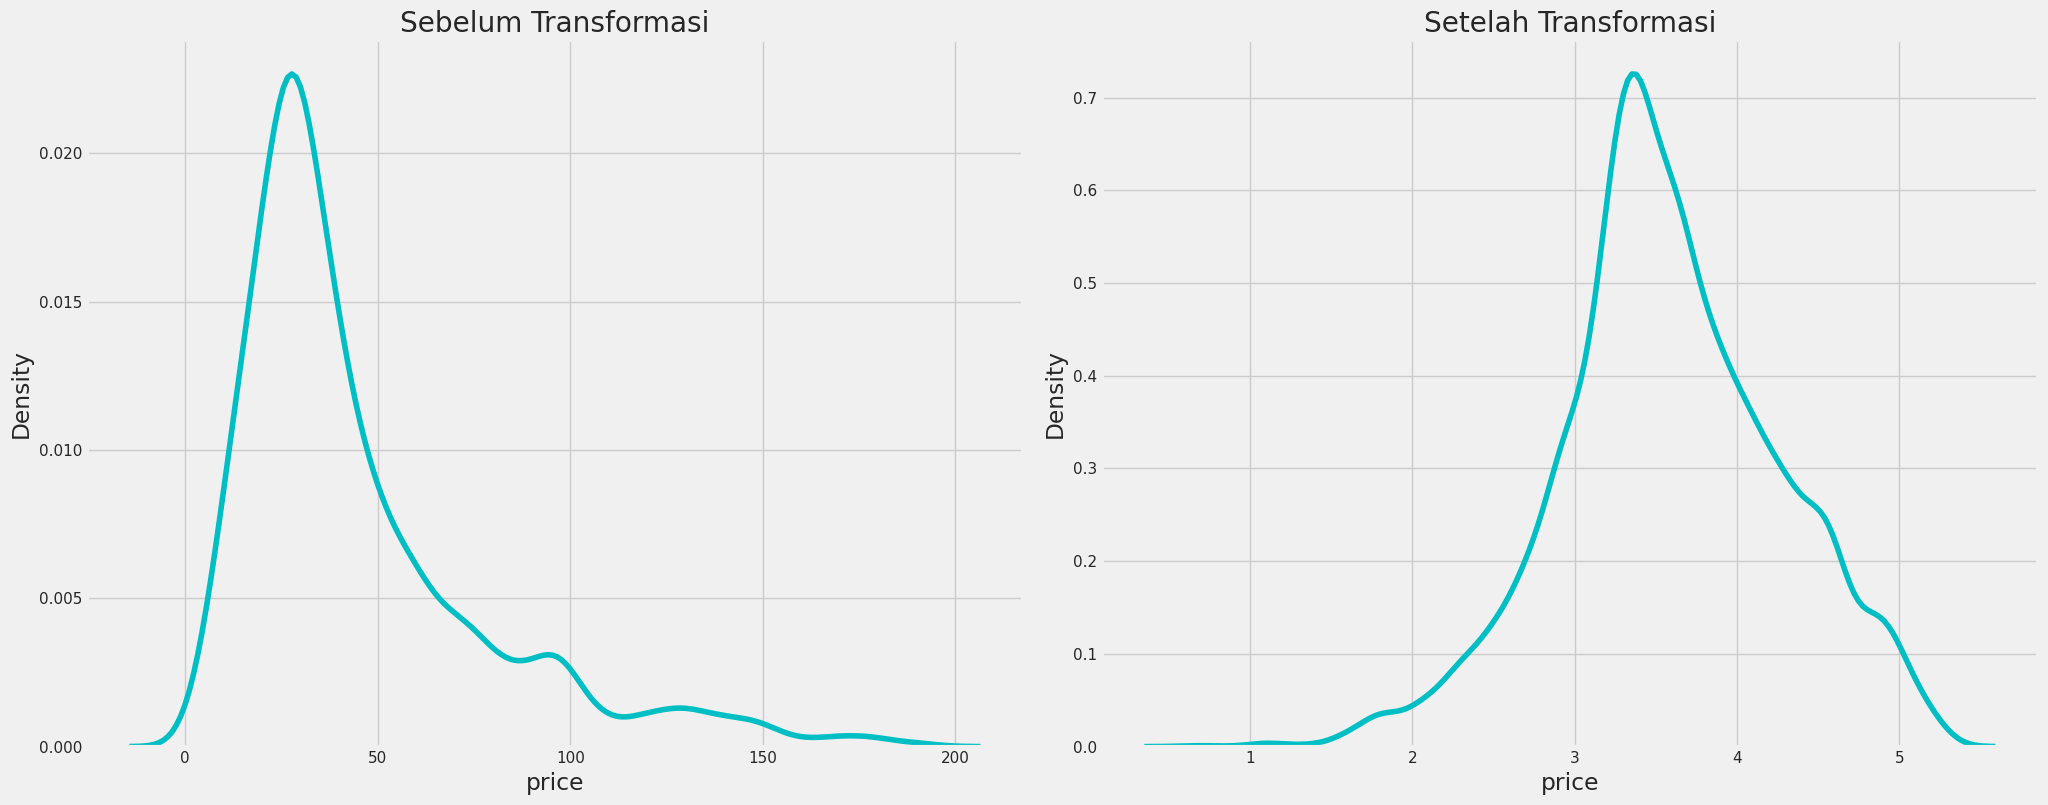

In [ ]:
# Membuat kolom log_price
df['log_price'] = np.log(df['price'])

# Log transformation
fig, ax = plt.subplots(1, 2)
ax1 = sns.kdeplot(x = df['price'], color = '#00bfc4', ax = ax[0])
ax1.set_title('Sebelum Transformasi')
ax2 = sns.kdeplot(x = np.log(df['price']), color = '#00bfc4', ax = ax[1])
ax2.set_title('Setelah Transformasi')
plt.tight_layout()

plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7357 entries, 0 to 7998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7357 non-null   int64  
 1   brand              7357 non-null   object 
 2   category           7357 non-null   object 
 3   rating             7357 non-null   float64
 4   number_of_reviews  7357 non-null   float64
 5   love               7357 non-null   float64
 6   price              7357 non-null   float64
 7   value_price        7357 non-null   float64
 8   exclusive          7357 non-null   int64  
 9   rating_norm        7357 non-null   float64
 10  rating_std         7357 non-null   float64
 11  log_price          7357 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 747.2+ KB


In [ ]:
## Feature Encoding

# Memilih 5 top brand dan category dan sisanya masuk ke value 'other'
# Brand
df['brand_top5'] = np.array(['Other']*len(df))

for i in range(len(df['brand'])):
    if df['brand'].iloc[i] in ['SEPHORA COLLECTION', 'CLINIQUE', 'TOM FORD', 'tarte', "Kiehl's Since 1851"]:
        df['brand_top5'].iloc[i] = df['brand'].iloc[i]

# Category
df['category_top5'] = np.array(['Other']*len(df))

for i in range(len(df['category'])):
    if df['category'].iloc[i] in ['Perfume', 'Moisturizers', 'Face Serums', 'Value & Gift Sets', 'Face Wash & Cleansers']:
        df['category_top5'].iloc[i] = df['category'].iloc[i]

df.sample(4)

<ipython-input-25-7fb60675033e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brand_top5'].iloc[i] = df['brand'].iloc[i]
<ipython-input-25-7fb60675033e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category_top5'].iloc[i] = df['category'].iloc[i]


,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive,rating_norm,rating_std,log_price,brand_top5,category_top5
4264,2046597,Farmacy,Face Wash & Cleansers,4.0,592.0,31200.0,28.0,28.0,1,0.666667,-0.313686,3.332205,Other,Face Wash & Cleansers
5042,2112068,Nurse Jamie,Decollete & Neck Creams,3.5,2.0,1900.0,28.0,28.0,0,0.500000,-1.300340,3.332205,Other,Other
4208,2041994,amika,Hair,4.5,63.0,10300.0,10.0,10.0,0,0.833333,0.672969,2.302585,Other,Other
673,1375583,Origins,Eye Creams & Treatments,4.0,159.0,8700.0,50.0,50.0,0,0.666667,-0.313686,3.912023,Other,Other


In [ ]:
onehotsbrand = pd.get_dummies(df['brand_top5'], prefix = 'brand')
df = df.join(onehotsbrand)

onehotscat = pd.get_dummies(df['category_top5'], prefix = 'category')
df = df.join(onehotscat)

df.head()

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive,rating_norm,...,brand_Other,brand_SEPHORA COLLECTION,brand_TOM FORD,brand_tarte,category_Face Serums,category_Face Wash & Cleansers,category_Moisturizers,category_Other,category_Perfume,category_Value & Gift Sets
0,50,SEPHORA COLLECTION,no category,5.0,46.0,0.0,50.0,50.0,0,1.000000,...,0,1,0,0,0,0,0,1,0,0
5,6528,Givenchy,Perfume,4.5,94.0,3000.0,78.0,78.0,0,0.833333,...,1,0,0,0,0,0,0,0,1,0
6,7393,BVLGARI,Cologne,5.0,31.0,3300.0,94.0,94.0,0,1.000000,...,1,0,0,0,0,0,0,1,0,0
7,7740,Yves Saint Laurent,Perfume,4.5,164.0,4200.0,62.0,62.0,0,0.833333,...,1,0,0,0,0,0,0,0,1,0
8,11023,Carolina Herrera,Perfume,4.5,127.0,2900.0,86.0,86.0,0,0.833333,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
df_new = df.drop(columns = ['brand', 'category', 'brand_top5', 'category_top5'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7357 entries, 0 to 7998
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7357 non-null   int64  
 1   rating                          7357 non-null   float64
 2   number_of_reviews               7357 non-null   float64
 3   love                            7357 non-null   float64
 4   price                           7357 non-null   float64
 5   value_price                     7357 non-null   float64
 6   exclusive                       7357 non-null   int64  
 7   rating_norm                     7357 non-null   float64
 8   rating_std                      7357 non-null   float64
 9   log_price                       7357 non-null   float64
 10  brand_CLINIQUE                  7357 non-null   uint8  
 11  brand_Kiehl's Since 1851        7357 non-null   uint8  
 12  brand_Other                     73

In [ ]:
## Handle Class Imbalance
x = df_new[[col for col in df_new.columns if (str(df_new[col].dtype) != 'object') and col not in ['exclusive']]]
y = df_new['exclusive'].values
print(x.shape)
print(y.shape)
print(pd.Series(y).value_counts())

(7357, 21)
(7357,)
0    5437
1    1920
dtype: int64


In [ ]:
from imblearn import over_sampling
x_over, y_over = over_sampling.SMOTE(sampling_strategy = 1).fit_resample(x, y)
print(pd.Series(y_over).value_counts())

0    5437
1    5437
dtype: int64


## **5. Feature Engineering (30 poin)**

Cek feature yang ada sekarang, lalu lakukan:<br>
<br>
A. <u>**Feature selection**</u> (membuang feature yang kurang relevan atau redundan)<br>
B. <u>**Feature extraction**</u> (membuat feature baru dari feature yang sudah ada)<br>
C. Tuliskan minimal <u>**4 feature tambahan**</u> (selain yang sudah tersedia di dataset) yang mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya dan tidak perlu diimplementasikan)<br>
<br>
Untuk 5A & 5B, tetap tuliskan jika memang tidak bisa dilakukan (contoh: ```“Semua feature digunakan untuk modelling (tidak ada yang dihapus), karena semua feature relevan”```)

#### **A. Feature Selection**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7357 entries, 0 to 7998
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7357 non-null   int64  
 1   brand                           7357 non-null   object 
 2   category                        7357 non-null   object 
 3   rating                          7357 non-null   float64
 4   number_of_reviews               7357 non-null   float64
 5   love                            7357 non-null   float64
 6   price                           7357 non-null   float64
 7   value_price                     7357 non-null   float64
 8   exclusive                       7357 non-null   int64  
 9   rating_norm                     7357 non-null   float64
 10  rating_std                      7357 non-null   float64
 11  log_price                       7357 non-null   float64
 12  brand_top5                      73

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7357 entries, 0 to 7998
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7357 non-null   int64  
 1   rating                          7357 non-null   float64
 2   number_of_reviews               7357 non-null   float64
 3   love                            7357 non-null   float64
 4   price                           7357 non-null   float64
 5   value_price                     7357 non-null   float64
 6   exclusive                       7357 non-null   int64  
 7   rating_norm                     7357 non-null   float64
 8   rating_std                      7357 non-null   float64
 9   log_price                       7357 non-null   float64
 10  brand_CLINIQUE                  7357 non-null   uint8  
 11  brand_Kiehl's Since 1851        7357 non-null   uint8  
 12  brand_Other                     73

<Axes: >

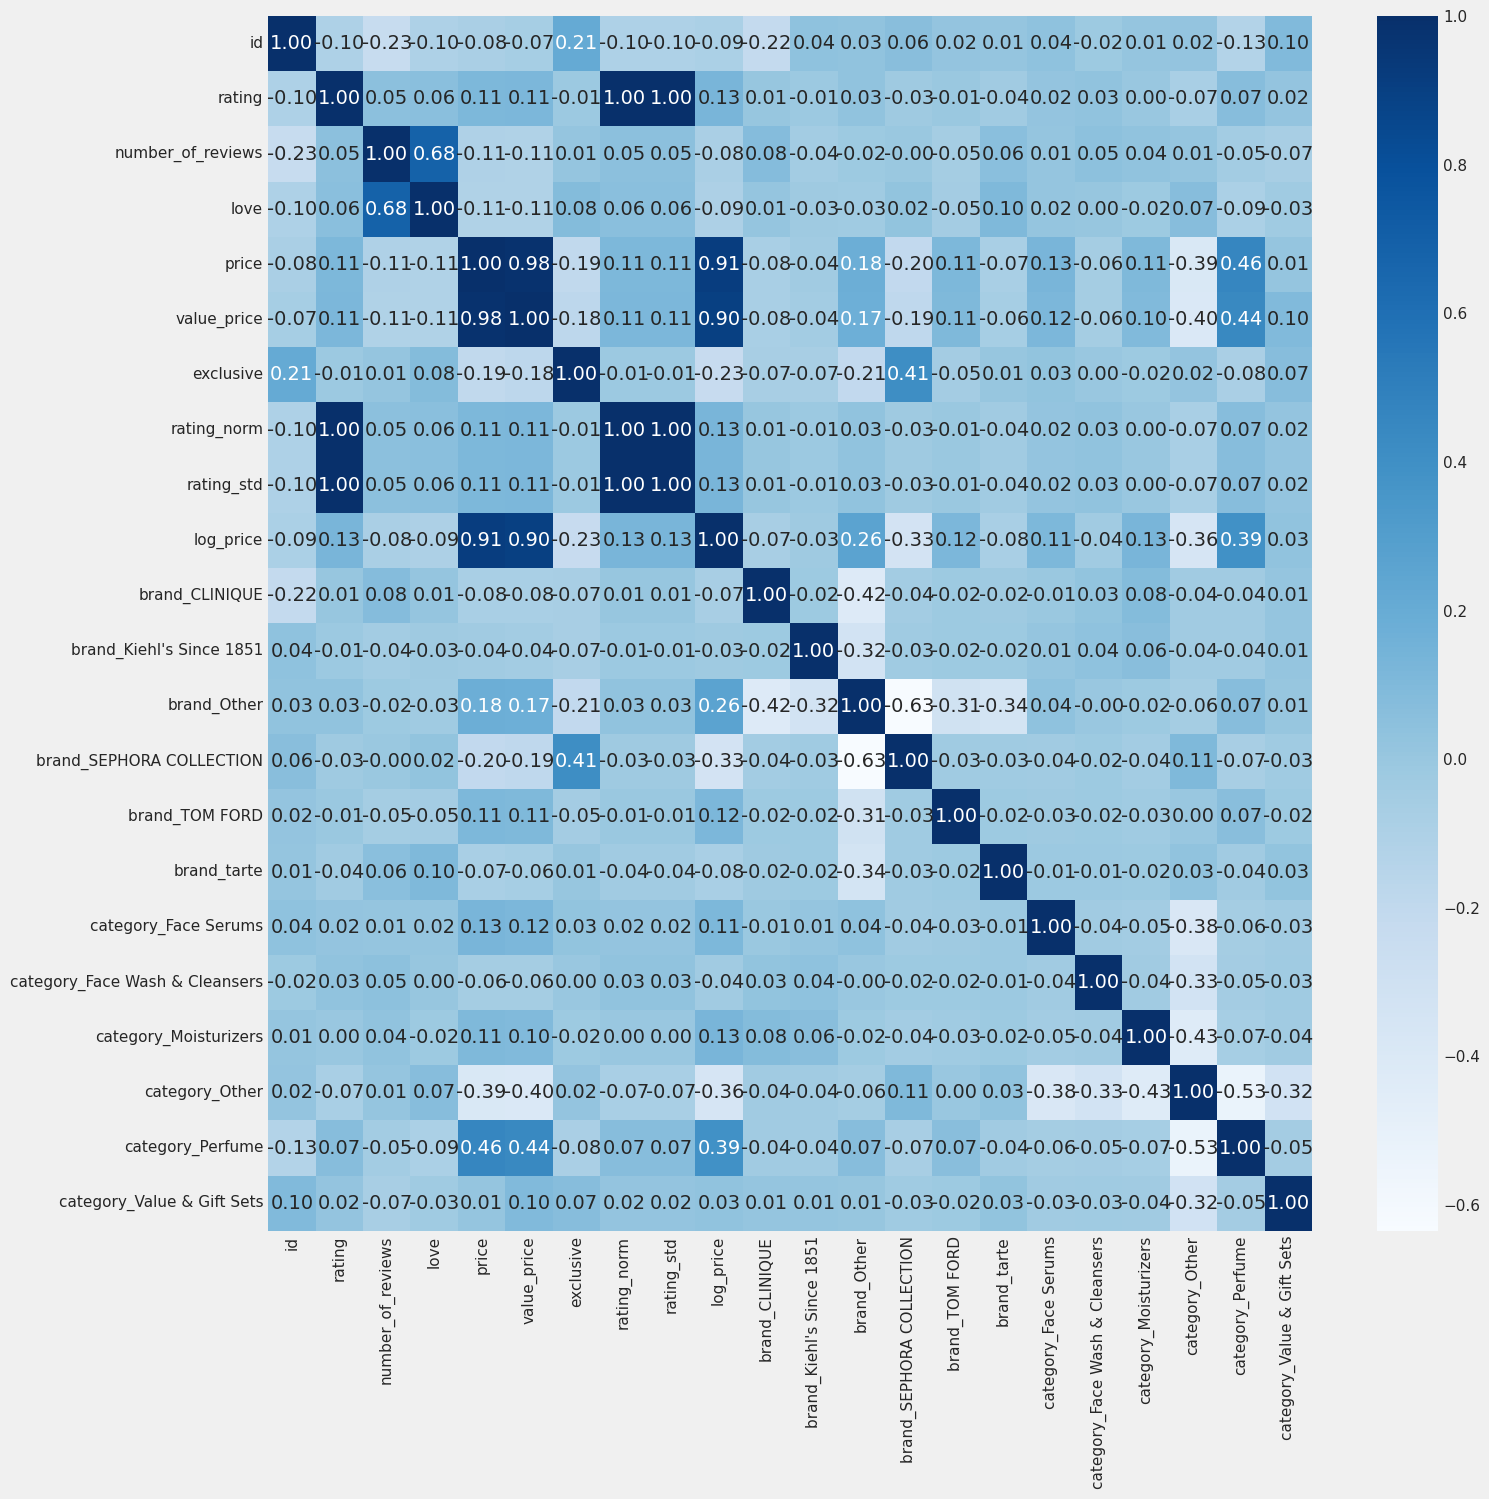

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_new.corr(), cmap='Blues', annot=True, fmt='.2f')

Dari heatmap di atas, maka dapat dicari kriteria feature yang tidak dipakai/dibuang karena kurang relevan dan redundan:

1. Feature yang kurang relevan = id,
2. Feature redundan (> 0,7) =

*   rating, rating_norm, rating_std
*   price, value_price, log_price

Feature yang yang mempunyai korelasi > 0,7 harus dihapus dan digunakan hanya salah satu fitur saja.

In [ ]:
# Menghapus feature yang kurang relevan dan feature redundan

drop_columns = ['id', 'value_price', 'log_price', 'rating_norm', 'rating_std']
df_new2 = df_new.drop(drop_columns, axis=1)

In [ ]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7357 entries, 0 to 7998
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   rating                          7357 non-null   float64
 1   number_of_reviews               7357 non-null   float64
 2   love                            7357 non-null   float64
 3   price                           7357 non-null   float64
 4   exclusive                       7357 non-null   int64  
 5   brand_CLINIQUE                  7357 non-null   uint8  
 6   brand_Kiehl's Since 1851        7357 non-null   uint8  
 7   brand_Other                     7357 non-null   uint8  
 8   brand_SEPHORA COLLECTION        7357 non-null   uint8  
 9   brand_TOM FORD                  7357 non-null   uint8  
 10  brand_tarte                     7357 non-null   uint8  
 11  category_Face Serums            7357 non-null   uint8  
 12  category_Face Wash & Cleansers  73

Banyak feature yang sebelumnya adalah sebanyak 22 feature lalu menjadi 16 feature setelah dilakukan feature selection

In [ ]:
df_new2.head(10)

,rating,number_of_reviews,love,price,exclusive,brand_CLINIQUE,brand_Kiehl's Since 1851,brand_Other,brand_SEPHORA COLLECTION,brand_TOM FORD,brand_tarte,category_Face Serums,category_Face Wash & Cleansers,category_Moisturizers,category_Other,category_Perfume,category_Value & Gift Sets
0,5.0,46.0,0.0,50.0,0,0,0,0,1,0,0,0,0,0,1,0,0
5,4.5,94.0,3000.0,78.0,0,0,0,1,0,0,0,0,0,0,0,1,0
6,5.0,31.0,3300.0,94.0,0,0,0,1,0,0,0,0,0,0,1,0,0
7,4.5,164.0,4200.0,62.0,0,0,0,1,0,0,0,0,0,0,0,1,0
8,4.5,127.0,2900.0,86.0,0,0,0,1,0,0,0,0,0,0,0,1,0
9,5.0,20.0,2200.0,85.0,0,0,0,1,0,0,0,0,0,0,0,1,0
10,5.0,24.0,3400.0,98.0,0,0,0,1,0,0,0,0,0,0,0,1,0
11,4.5,36.0,2600.0,144.0,0,0,0,1,0,0,0,0,0,0,0,1,0
12,4.5,116.0,1800.0,90.0,0,0,0,1,0,0,0,0,0,0,1,0,0
14,3.5,7.0,4300.0,130.0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
df_new2.describe()

,rating,number_of_reviews,love,price,exclusive,brand_CLINIQUE,brand_Kiehl's Since 1851,brand_Other,brand_SEPHORA COLLECTION,brand_TOM FORD,brand_tarte,category_Face Serums,category_Face Wash & Cleansers,category_Moisturizers,category_Other,category_Perfume,category_Value & Gift Sets
count,7357.000000,7357.000000,7357.000000,7357.000000,7357.000000,7357.000000,7357.000000,7357.000000,7357.000000,7357.000000,7357.000000,7357.000000,7357.000000,7357.000000,7357.000000,7357.000000,7357.000000
mean,4.158964,216.316569,13458.330026,45.015519,0.260976,0.027593,0.016311,0.862852,0.060215,0.015088,0.017942,0.040642,0.029768,0.050156,0.776539,0.074895,0.028001
std,0.506797,393.330188,20558.040367,32.668642,0.439197,0.163814,0.126677,0.344027,0.237900,0.121910,0.132750,0.197472,0.169957,0.218282,0.416593,0.263239,0.164985
min,2.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,16.000000,2100.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,4.000000,58.000000,5600.000000,34.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,4.500000,222.000000,15000.000000,56.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,5.000000,3000.000000,147100.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

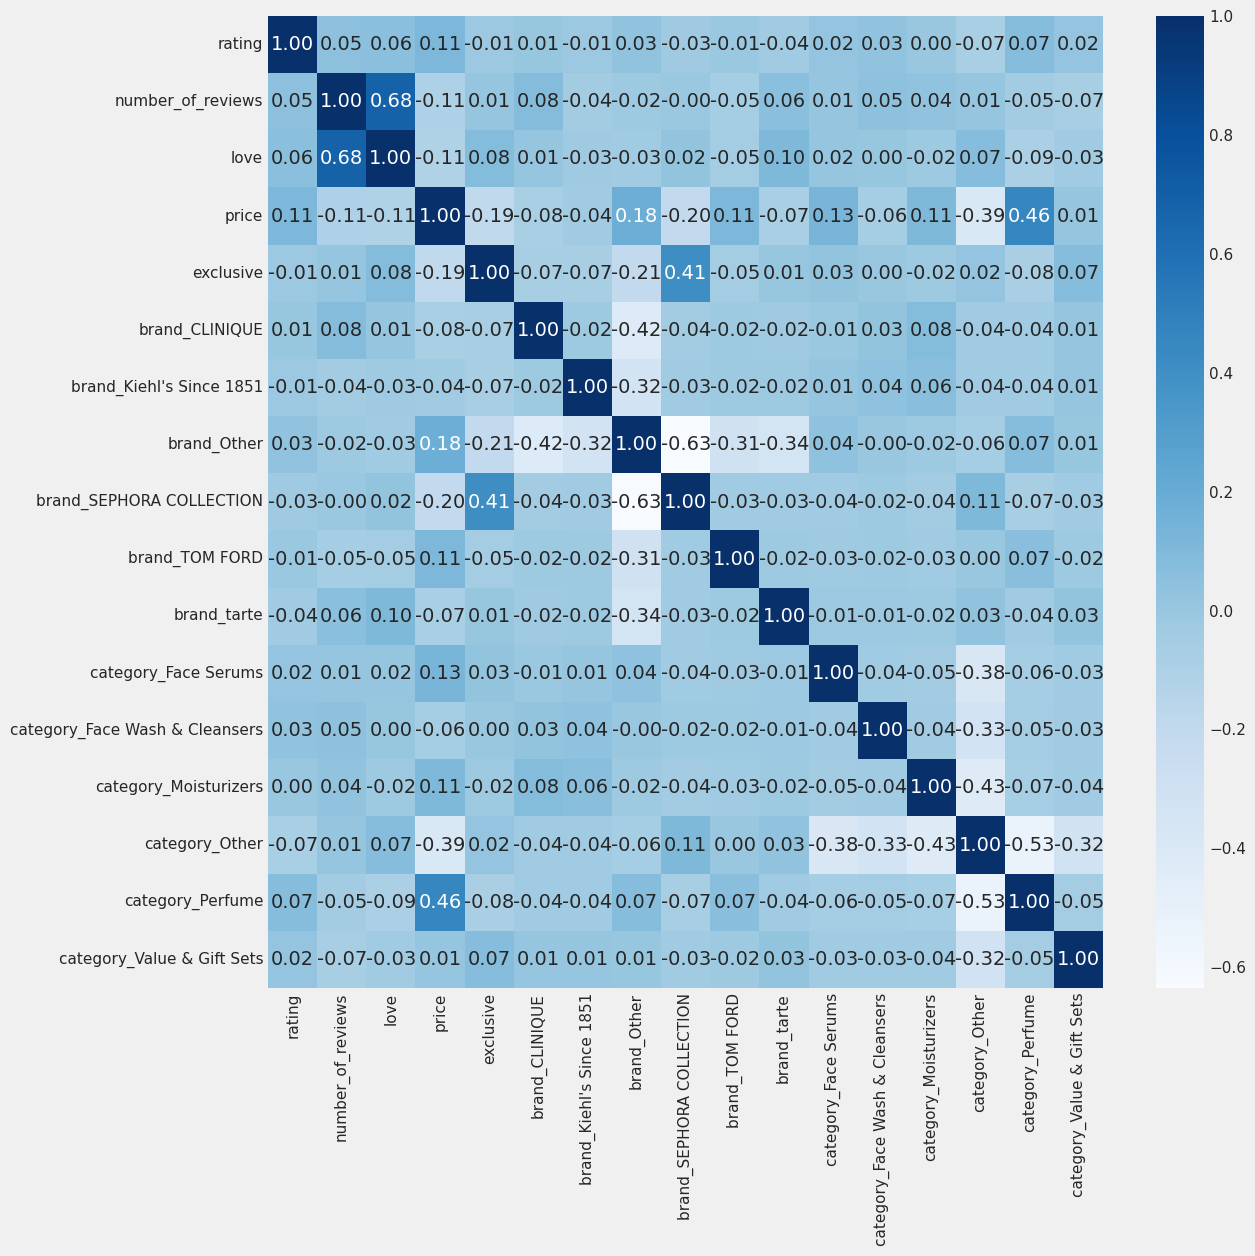

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_new2.corr(), cmap='Blues', annot=True, fmt='.2f')

Jadi, dari heatmap di atas terlihat bahwa sudah tidak ada feature yang kurang releven dan feature redundan/korelasi antar variable bebas (multikolinearitas)

#### **B. Feature Extraction**

Fitur baru Product Reputation dengan nama "product_rep" dibuat berdasarkan nilai rating. Fitur ini akan mengkategorikan rating menjadi tiga kategori: "Poor" untuk rating kurang dari atau sama dengan 2.99, "Moderate" untuk rating antara 3.0 hingga 3.99, dan "High" untuk rating antara 4.0 hingga 5.0.

In [ ]:
# Membuat fitur "Product Reputation"
df_new2['product_rep'] = np.where(df_new2['rating'] >= 4.0, 'High', np.where(df['rating'] >= 3.0, 'Moderate', 'Low'))
df_new2['product_rep']

0       High
5       High
6       High
7       High
8       High
        ... 
7993    High
7994    High
7996    High
7997    High
7998    High
Name: product_rep, Length: 7357, dtype: object

Fitur "total_sales" dibuat dengan mengalikan jumlah ulasan ("number_of_reviews") dengan harga produk ("value_price"). Fitur ini memberikan perkiraan total penjualan produk.

In [ ]:
# Perkiraan total penjualan
df_new2['total_sales'] = df_new2['number_of_reviews'] * df_new2['price']
df_new2['total_sales']

0        2300.0
5        7332.0
6        2914.0
7       10168.0
8       10922.0
         ...   
7993      252.0
7994       85.0
7996     1650.0
7997      638.0
7998       60.0
Name: total_sales, Length: 7357, dtype: float64

Membuat fitur baru bernama "popularity" berdasarkan jumlah ulasan ("number_of_reviews"). Jika nilai jumlah ulasan pada suatu baris melebihi rata-rata jumlah ulasan dari seluruh data, maka nilai fitur "popularity" untuk baris tersebut akan diisi dengan string "Popular". Jika nilai jumlah ulasan tidak melebihi rata-rata, maka nilai fitur "popularity" akan diisi dengan string "Not Popular".

In [ ]:
# Membuat fitur "Popularity"
df_new2['popularity'] = np.where(df_new2['number_of_reviews'] > df_new2['number_of_reviews'].mean(), 'Popular', 'Not Popular')
df_new2['popularity']

0       Not Popular
5       Not Popular
6       Not Popular
7       Not Popular
8       Not Popular
           ...     
7993    Not Popular
7994    Not Popular
7996    Not Popular
7997    Not Popular
7998    Not Popular
Name: popularity, Length: 7357, dtype: object

Membuat fitur baru Rentang Harga bernama "price_range" berdasarkan harga ("price") di mana jika harga >= 50 maka harganya 'Medium', jika harga >=100 maka harganya 'High' dan jika harga selain itu (di bawah 50) maka harganya 'Low'.

In [ ]:
# Membuat fitur "Rentang Harga"
df_new2['price_range'] = np.where(df_new2['price'] >= 100, 'High', np.where(df['price'] >= 50, 'Medium', 'Low'))
df_new2['price_range']

0       Medium
5       Medium
6       Medium
7       Medium
8       Medium
         ...  
7993       Low
7994    Medium
7996    Medium
7997       Low
7998       Low
Name: price_range, Length: 7357, dtype: object

In [ ]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7357 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   rating                          7357 non-null   float64
 1   number_of_reviews               7357 non-null   float64
 2   love                            7357 non-null   float64
 3   price                           7357 non-null   float64
 4   exclusive                       7357 non-null   int64  
 5   brand_CLINIQUE                  7357 non-null   uint8  
 6   brand_Kiehl's Since 1851        7357 non-null   uint8  
 7   brand_Other                     7357 non-null   uint8  
 8   brand_SEPHORA COLLECTION        7357 non-null   uint8  
 9   brand_TOM FORD                  7357 non-null   uint8  
 10  brand_tarte                     7357 non-null   uint8  
 11  category_Face Serums            7357 non-null   uint8  
 12  category_Face Wash & Cleansers  73

In [ ]:
df_new2.head(5)

,rating,number_of_reviews,love,price,exclusive,brand_CLINIQUE,brand_Kiehl's Since 1851,brand_Other,brand_SEPHORA COLLECTION,brand_TOM FORD,...,category_Face Serums,category_Face Wash & Cleansers,category_Moisturizers,category_Other,category_Perfume,category_Value & Gift Sets,product_rep,total_sales,popularity,price_range
0,5.0,46.0,0.0,50.0,0,0,0,0,1,0,...,0,0,0,1,0,0,High,2300.0,Not Popular,Medium
5,4.5,94.0,3000.0,78.0,0,0,0,1,0,0,...,0,0,0,0,1,0,High,7332.0,Not Popular,Medium
6,5.0,31.0,3300.0,94.0,0,0,0,1,0,0,...,0,0,0,1,0,0,High,2914.0,Not Popular,Medium
7,4.5,164.0,4200.0,62.0,0,0,0,1,0,0,...,0,0,0,0,1,0,High,10168.0,Not Popular,Medium
8,4.5,127.0,2900.0,86.0,0,0,0,1,0,0,...,0,0,0,0,1,0,High,10922.0,Not Popular,Medium


#### **C. Menambahkan 4 Feature Baru**

1. **Availability** (int64): Jumlah produk yang diproduksi. Produk eksklusif biasanya diproduksi dalam jumlah terbatas sehingga menjadikannya langka atau sulit diperoleh. Oleh karena itu, produk dengan availability yang sedikit cenderung akan menjadi produk eksklusif dan begitu juga sebaliknya.
2. **Material_Quality** ((int64): Premium = 1, High = 2, Medium = 3, Low = 4. Kualitas dari material yang digunakan. Semakin bagus atau tinggi kualitas dari material yang digunakan maka produk akan cenderung menjadi eksklusif.
3. **Time_Offers** (int64): Rentang waktu produk dijual dalam satuan hari. Semakin pendek rentang waktu penjualan, maka produk akan cenderung menjadi eksklusif.
4. **Guarantee** (int64): Rentang waktu garansi produk jika terjadi kerusakan dalam satuan bulan. Semakin lama rentang waktu garansi, maka semakin baik juga kualitas pelayanan pelanggan yang diberikan, sehingga membuat produk akan cenderung menjadi eksklusif.